# 10장. 회귀 분석으로 연속적 타깃 변수 예측하기

# 1. 주택 데이터셋 탐색

타깃(y)=주택가격(MEDV)

### 1) 데이터프레임으로 주택 데이터셋 load

<pre>
1. CRIM: 도시의 인당 범죄율
2. ZN: 25,000 평방 피트가 넘는 주택 비율
3. INDUS: 도시에서 소매 업종이 아닌 지역 비율
4. CHAS: 찰스강 인접 여부(강 주변=1, 그 외=0)
5. NOX: 일산화질소 농도(10ppm 당)
6. RM: 주택의 평균 방 개수
7. AGE: 1940년 이전에 지어진 자가 주택 비율
8. DIS: 다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
9. RAD: 방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX: $10,000당 재산세율
11. PTRATIO: 도시의 학생-교사 비율
12. B: 1000(Bk - 0.63)^2, 여기에서 Bk는 도시의 아프리카계 미국인 비율
13. LSTAT: 저소득 계층의 비율
14. MEDV: 자가 주택의 중간 가격($1,000 단위)
</pre>

In [46]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 2) EDA

##### 2-1) 산점도 행렬
    - 데이터 특성 간의 관계 시각적 요약

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

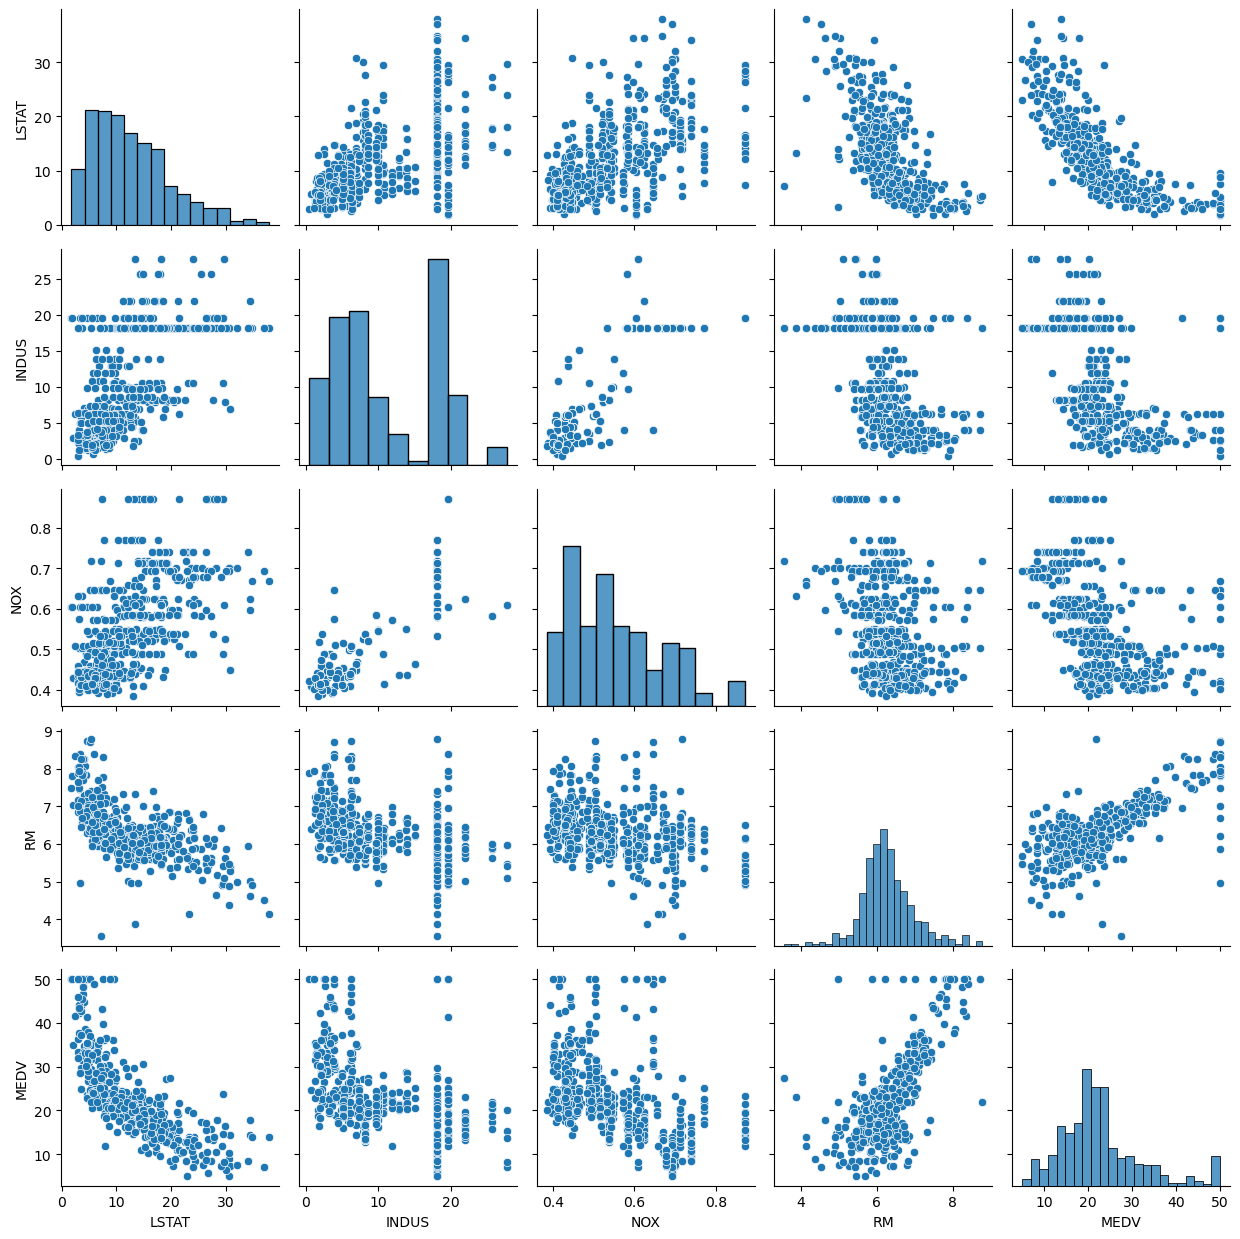

In [48]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

##### 2-2) 상관관계 행렬
    - 변수간 선형 관계 정량화

LSTAT변수가 타킷(MEDV)와 음의 상관관계 높음

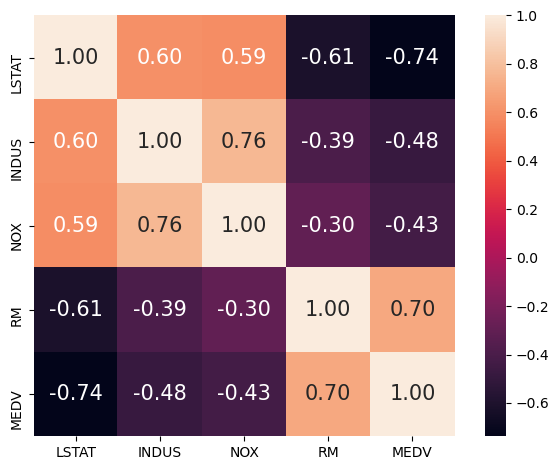

In [49]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

# 2. 최소 제곱 선형 회귀 모델 구현하기

### 1) 경사 하강법으로 회귀 모델의 파라미터(가중치) 추정

- OLS회귀 = 아달린 경사하강법 코드에서 단위 계단 함수 제거

In [50]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
        #return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1) 아달린 단위 계단 함수

RM으로 MEDV 예측 예제

In [51]:
X = df[['RM']].values
y = df['MEDV'].values

In [52]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [53]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

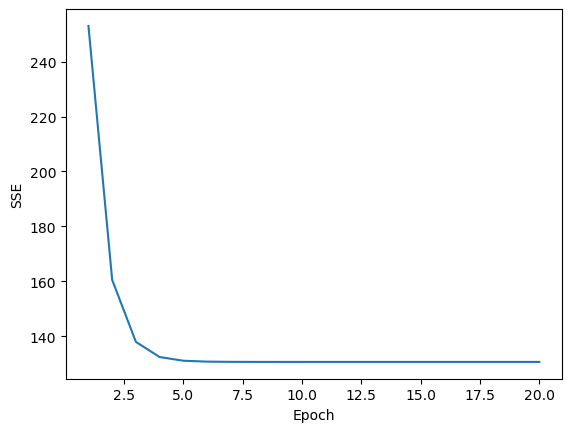

In [54]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE') #제곱오차합
plt.xlabel('Epoch') #에포크
plt.show()

산점도, 회귀 직선 그려주는 함수

In [55]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

시각화

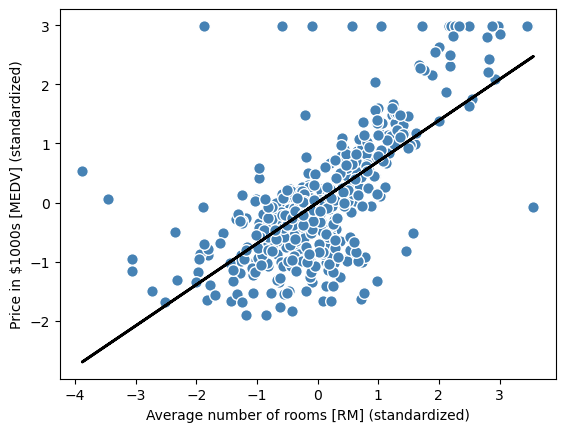

In [56]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

선형 회귀 함수 기울기, 절편

In [57]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


원본 스케일로 복원한 값
- x=5일때 y값 출력

In [58]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std))

$1,000 단위 가격: 10.840


### 2) 사이킷런 라이브러리로 회귀 모델의 파라미터 추정

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


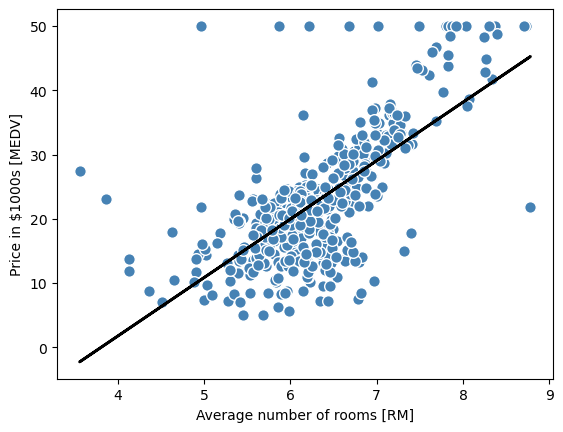

In [61]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

**정규 방정식**을 사용한 방법:

In [62]:
# 1로 채워진 열 벡터 추가
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


# 3. RANSAC을 사용하여 안정된 회귀 모델 훈련하기

RANSACRegressor
- max_trials=최대 반복 횟수
- min_samples=랜덤하게 선택할 샘플 갯수 
- loss='absolute_loss' 오차 계산법 (수직 거리 절댓값)
- residual_threshold=5.0 오차 범위 5

In [63]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)

ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

정상치, 이상치, 선형 모델을 함께 시각화

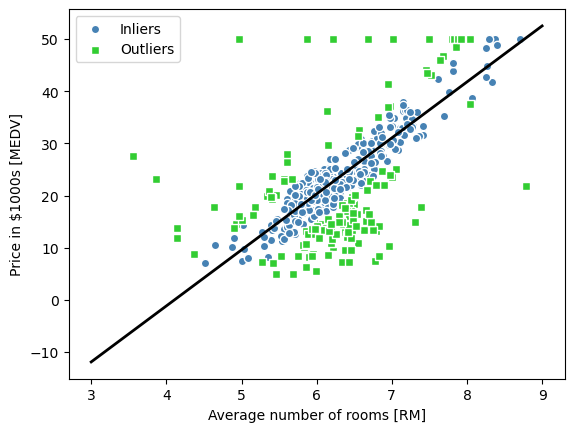

In [64]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [65]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


# 4. 선형 회귀 모델의 성능 평가

### 1) 모든 변수를 사용해 다변량 회귀 모델 훈련

In [66]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [67]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### 2) 잔차 그래프
- n차원 모델이므로 선형 회귀 직선을 그릴 수 없음
- 에측y- 진짜y

In [68]:
import numpy as np
import scipy as sp

ary = np.array(range(100000))

In [69]:
%timeit np.linalg.norm(ary)

132 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [70]:
%timeit sp.linalg.norm(ary)

149 µs ± 30.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [71]:
%timeit np.sqrt(np.sum(ary**2))

181 µs ± 41.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


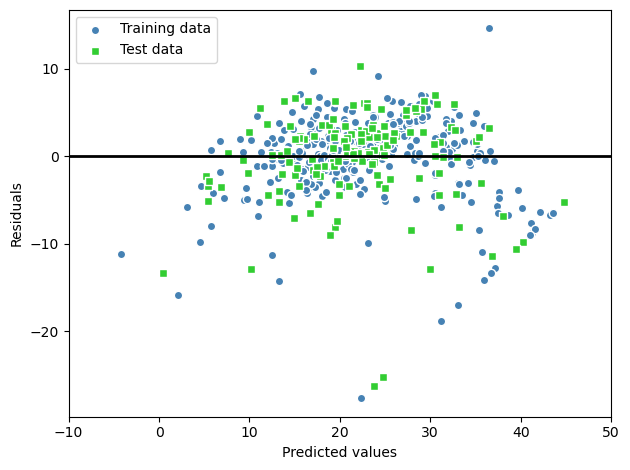

In [72]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

### 3) 평균 제곱 오차(MSE), 결정계수(R^2)
- MES: 적을 수록 정확
- R^2: 1에 가까울 수록 정확


In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 19.958, 테스트 MSE: 27.196
훈련 R^2: 0.765, 테스트 R^2: 0.673


# 5. 회귀에 규제 적용하기

In [74]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [75]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 20.926, 테스트 MSE: 28.876
훈련 R^2: 0.753, 테스트 R^2: 0.653


### 1) 릿지 회귀

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

### 2) 라쏘 회귀

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

### 3) 엘라스틱 넷 회귀
- L1, L2비율 조절 가능
- IF l1_ratio=1.0이면 라쏘와 동일해짐

In [78]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 6. 선형 회귀 모델을 다항 회귀로 변환하기

### 1) 단항모델, 다항 모델 훈련, 시각화, 성능 비교

1. 단항 -> 다항으로 항 추가

In [79]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [80]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

2. 선형(단항), 비선형(다변량) 회귀 모델 훈련 + 시각화

- 결과: 다항 회귀 모델이 특성과 타깃 관계를 훨씬 잘 잡아냄

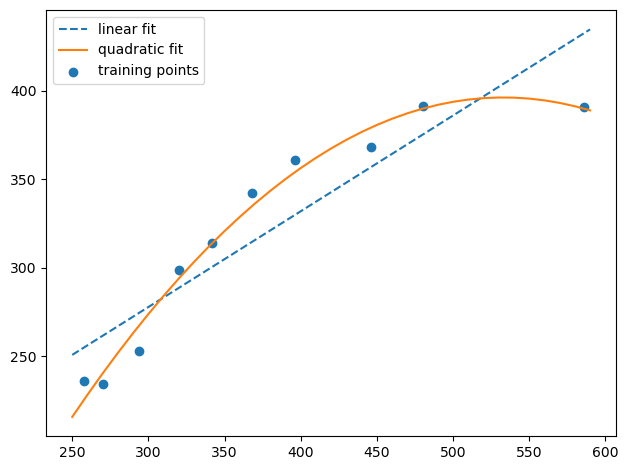

In [81]:
# 선형 특성 학습
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 이차항 특성 학습
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 결과 그래프
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

3. 전체로 최종 훈련

In [82]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

4. MES. R^2로 두 모델 성능

In [83]:
print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


### 2) 주택 데이터셋을 사용한 비선형 관계 모델링

1. x=LSTAT의 하나의 특성-> 다항 특성으로 변환 -> 1차, 2차, 3차 각각의 모델로 학습 -> 시각화

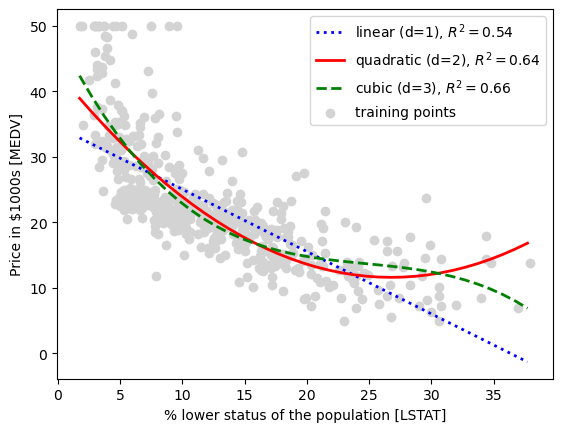

In [84]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

#1차
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

#2차
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

#3차
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

다항 특성이 비선형 모델을 모델링하는 최선의 방법은 아니다.<br>
산점도를 보았을때 데이터 분포가 지수 함수와 비슷함 -> 지수 함수에 자연로그를 취해 직선으로 만들 수 있다. 

2. 자연로그 취하여 직선으로 변형 후 -> 선형 모델 학습 -> 시각화

- 결과: 가장 좋은 R^2성능을 보임

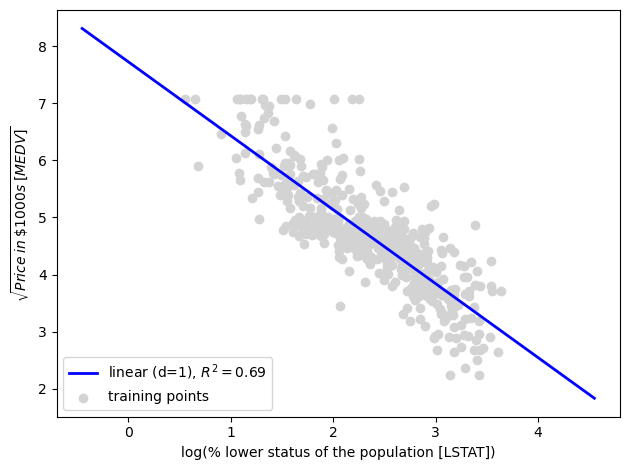

In [85]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# 특성을 변환합니다
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 결과 그래프를 그립니다
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# 7. 랜덤 포레스트를 사용하여 비선형 관계 다루기

### 1) 결정 트리 회귀

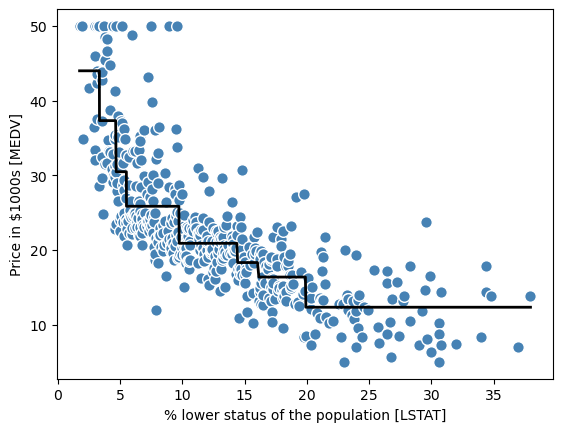

In [86]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### 2) 랜덤 포레스트 회귀

데이터 load, 분류

In [87]:
X = df.iloc[:, :-1].values #모든 특성 사용
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 40% 60%

train, test에 대한 MES, R^2 비교
- 결과1: MSE를 보았을 때, train데이터에 과대 적합 되었다는 것을 알 수 있다
- 결과2: R^2를 보았을 때, 데이터를 잘 설명 하고 있다는 것을 알 수 있다 (1에 가까울 수록 좋은 성능) 

In [88]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
#모델 훈련
forest.fit(X_train, y_train)

#예측 생성
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 1.644, 테스트 MSE: 11.085
훈련 R^2: 0.979, 테스트 R^2: 0.877


예측 잔차 확인(N차원의 X를 갖고 있기 때문에 직접 시각화 불가)

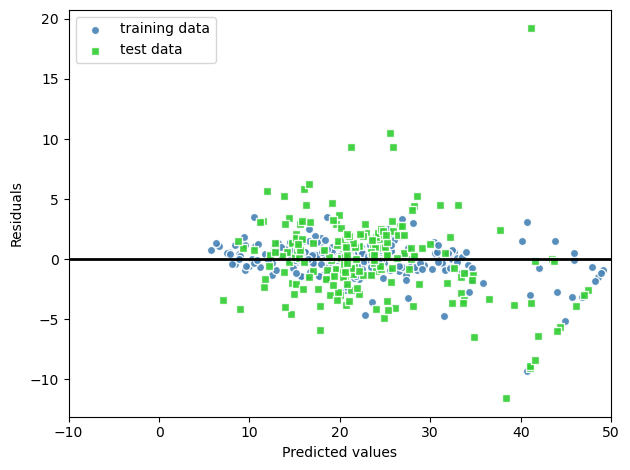

In [89]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

- Test데이터에 이상치 있음
- 잔차 그래프가 랜덤해 보이지 않음 => 특성 정보가 잔차로 누설됨